In [28]:
import pandas as pd
%store -r my_data_nan

In [29]:
for key,df in my_data_nan.iteritems():
    if 'reddit' not in df.index:
        print key

reddit_df


In [30]:
red_data = pd.DataFrame()
for key,df in my_data_nan.iteritems():
    if 'reddit' in df.index:
        new_df = df.loc['reddit'].rename(key.replace('_df','')).to_frame().reset_index().T
        new_df.columns = new_df.loc['year_month']
        new_df = new_df.drop(['year_month']) # (1,18)
        red_data = red_data.append(new_df)

In [31]:
red_data.isnull().sum()

year_month
2016-10    18
2016-11    19
2016-12    16
2017-01    15
2017-02    15
2017-03    23
2017-04    16
2017-05    17
2017-06    18
2017-07    20
2017-08    15
2017-09    25
2017-10     9
2017-11     7
2017-12    13
2018-01    12
2018-02     7
2018-03     9
dtype: int64

In [32]:
red_data = red_data.dropna(how='any')  

In [33]:
red_data

year_month,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
giphy,0.272357,0.199846,0.243221,0.21876,0.224364,0.295082,0.402918,0.420985,0.425844,0.385088,0.393634,0.318722,0.382755,0.402208,0.496264,0.527623,0.530623,0.542629
bedbathandbeyond,0.38703,0.138535,0.111358,0.169998,0.220688,0.134145,0.156126,0.0658415,0.132557,0.0980877,0.0912948,0.0920384,0.103789,0.074595,0.0849739,0.0724853,0.143542,0.122557
citibankonline,0.0550734,0.06568,0.0579579,0.076019,0.0661066,0.0220065,0.0702391,0.0161249,0.0318635,0.0774109,0.0540962,0.0543651,0.0534572,0.0799347,0.0604151,0.0587046,0.0415506,0.047493
gofundme,0.0445616,0.0559823,0.0300963,0.031316,0.0121994,0.0124386,0.010645,0.0112237,0.0222307,0.00864404,0.00866312,0.00654923,0.00573267,0.014457,0.0114978,0.00690319,0.0434112,0.0238114
coursehero,0.0651117,0.0277364,0.0384937,0.0255244,0.0608539,0.0504372,0.0392608,0.0204481,0.0431887,0.0409404,0.0230545,0.0787202,0.0392036,0.0186833,0.0498781,0.049907,0.0304662,0.038778
steampowered,0.39575,0.398767,0.429467,0.462641,0.371936,0.384794,0.42602,0.326485,0.303977,0.219746,0.286885,0.283849,0.281919,0.228184,0.278852,0.228731,0.264861,0.231071
howtogeek,0.284455,0.402969,0.264444,0.245946,0.34375,0.323415,0.222138,0.233908,0.235735,0.2736,0.293085,0.271503,0.238761,0.239034,0.27464,0.413634,0.363326,0.30627
thrillist,0.0108345,0.00385498,0.00771903,0.00451378,0.00378687,0.00366037,0.00380643,0.00625726,0.00792927,0.0065442,0.00835527,0.0240244,0.00847885,0.00925473,0.0152386,0.00869647,0.00721066,0.0428893
history,0.480906,0.360739,0.154291,0.0804792,0.176773,0.123912,0.115645,0.111726,0.151706,0.152771,0.0706536,0.157761,0.193492,0.153698,0.091871,0.101153,0.225747,0.160207
github,0.302453,0.296693,0.314225,0.307541,0.26575,0.275063,0.245862,0.262658,0.285411,0.25586,0.326062,0.245765,0.236178,0.230443,0.265623,0.253846,0.238656,0.232908


In [34]:
red_avg_month = pd.DataFrame()
avg = []
for column in red_data:
    avg.append(red_data[column].mean()*100)

row = pd.Series(avg,red_data.columns.values)
red_avg_month = red_avg_month.append([row],ignore_index=True)
red_avg_month = red_avg_month.transpose().reset_index().rename(index=str,columns={'index':'date',0:'avg_share'})

In [35]:
red_avg_month

,date,avg_share
0,2016-10,14.887564
1,2016-11,14.334859
2,2016-12,14.988715
3,2017-01,14.399654
4,2017-02,13.814889
5,2017-03,13.713954
6,2017-04,14.133425
7,2017-05,14.244779
8,2017-06,14.216044
9,2017-07,13.611820


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
import functions_social as fs

In [37]:
red_data1 = red_data*100.0
mb = red_data1.T.reset_index()

In [38]:
df_long = pd.melt(mb,'year_month', var_name = 'site',value_name ='share' )
df_long['share'] = df_long['share'].astype(np.float)
df_long

,year_month,site,share
0,2016-10,giphy,27.235691
1,2016-11,giphy,19.984556
2,2016-12,giphy,24.322124
3,2017-01,giphy,21.875984
4,2017-02,giphy,22.436356
5,2017-03,giphy,29.508173
6,2017-04,giphy,40.291812
7,2017-05,giphy,42.098533
8,2017-06,giphy,42.584397
9,2017-07,giphy,38.508817


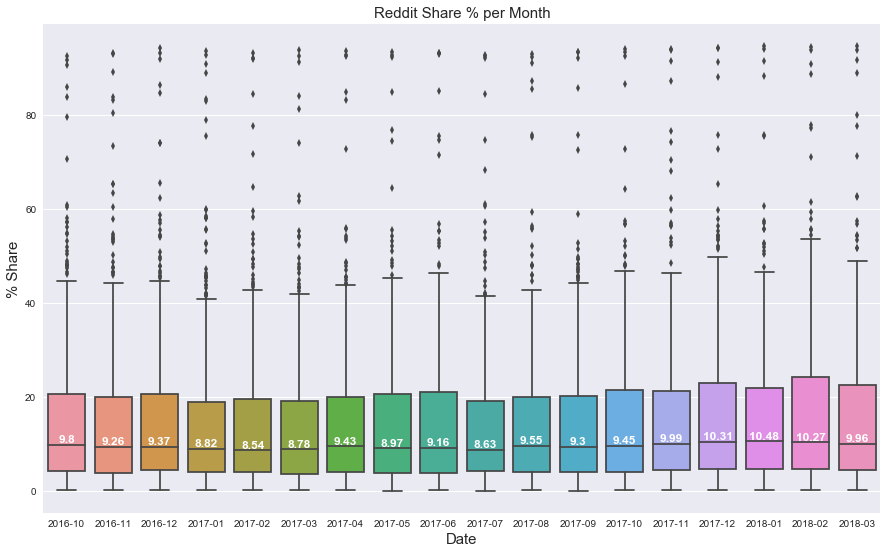

In [39]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='year_month',y='share',data=df_long)
#ax = sns.swarmplot(x='year_month',y='share',data=df_long)
medians = df_long.groupby(['year_month'])['share'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Reddit Share % per Month',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('% Share',fontsize=15)

plt.show()

In [40]:
#perc change from 2016-10 to 2017-10
red_year_10 = red_data[['2016-10','2017-10']]
red_year_10['perc_change'] = (red_data['2017-10']-red_data['2016-10'])*100
red_year_10 = red_year_10.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

#perc change from 2016-11 to 2017-11
red_year_11 = red_data[['2016-11','2017-11']]
red_year_11['perc_change'] = (red_data['2017-11']-red_data['2016-11'])*100
red_year_11 = red_year_11.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

red_year_12 = red_data[['2016-12','2017-12']]
red_year_12['perc_change'] = (red_data['2017-12']-red_data['2016-12'])*100
red_year_12 = red_year_12.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

red_year_1 = red_data[['2017-01','2018-01']]
red_year_1['perc_change'] = (red_data['2018-01']-red_data['2017-01'])*100
red_year_1 = red_year_1.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

red_year_2 = red_data[['2017-02','2018-02']]
red_year_2['perc_change'] = (red_data['2018-02']-red_data['2017-02'])*100
red_year_2 = red_year_2.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

red_year_3 = red_data[['2017-03','2018-03']]
red_year_3['perc_change'] = (red_data['2018-03']-red_data['2017-03'])*100
red_year_3 = red_year_3.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [41]:
red_year_10['year_month'] = 'October'
red_year_10 = red_year_10.rename(columns={'year_month':'month'})
red_year_10 = red_year_10.iloc[:,-2:]


red_year_11['year_month'] = 'November'
red_year_11 = red_year_11.rename(columns={'year_month':'month'})
red_year_11 = red_year_11.iloc[:,-2:]

red_year_12['year_month'] = 'December'
red_year_12 = red_year_12.rename(columns={'year_month':'month'})
red_year_12 = red_year_12.iloc[:,-2:]

red_year_1['year_month'] = 'January'
red_year_1 = red_year_1.rename(columns={'year_month':'month'})
red_year_1 = red_year_1.iloc[:,-2:]

red_year_2['year_month'] = 'February'
red_year_2 = red_year_2.rename(columns={'year_month':'month'})
red_year_2 = red_year_2.iloc[:,-2:]

red_year_3['year_month'] = 'March'
red_year_3 = red_year_3.rename(columns={'year_month':'month'})
red_year_3 = red_year_3.iloc[:,-2:]

red_all = red_year_10.append([red_year_11,red_year_12,red_year_1,red_year_2,red_year_3])

red_all['perc_change'] = red_all['perc_change'].astype(float)

red_all = red_all.reset_index()
red_all = red_all[['perc_change','month']]

red_all

year_month,perc_change,month
0,45.340673,October
1,35.605367,October
2,33.519238,October
3,29.102052,October
4,28.846610,October
5,28.737224,October
6,28.430603,October
7,28.305632,October
8,27.469070,October
9,22.517638,October


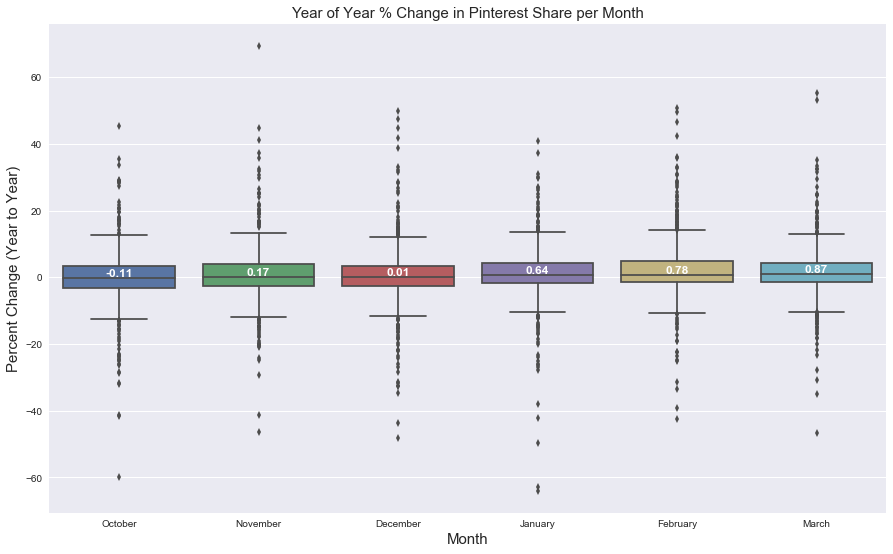

In [42]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='month',y='perc_change',data=red_all)

medians = red_all.groupby(['month'],sort=False)['perc_change'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Year of Year % Change in Pinterest Share per Month',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Percent Change (Year to Year)',fontsize=15)
plt.show()

In [44]:
%store red_year_3

Stored 'red_year_3' (DataFrame)
